In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from adam_wrangle import train_val_test
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from math import sqrt

import wrangle 
import evaluate

seed = 55

## 1. Load your zillow dataset.

In [4]:
zillow = wrangle.get_zillow()
zillow = wrangle.drop_zill(zillow)

In [5]:
train, val, test = wrangle.train_val_test(zillow)

In [6]:
train.head(2)

,bed,bath,sqft,value,year,tax,fips
274677,3.0,2.0,2159.0,364577.0,1967.0,4517.62,6037.0
283102,2.0,1.0,1072.0,162390.0,1954.0,1996.96,6037.0


## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft

In [7]:
# x and y train series
x_train = train[['sqft']]
y_train = train.tax

x_val = val[['sqft']]
y_val = val.tax

In [8]:
y_train.mean()

5613.675068463801

In [9]:
train['baseline'] = y_train.mean()

In [10]:
# assuming X and y are already defined
model = LinearRegression().fit(x_train, y_train)
predictions = model.predict(x_train)

In [11]:
train['yhat'] = predictions

In [12]:
train.head()

,bed,bath,sqft,value,year,tax,fips,baseline,yhat
274677,3.0,2.0,2159.0,364577.0,1967.0,4517.62,6037.0,5613.675068,6399.205686
283102,2.0,1.0,1072.0,162390.0,1954.0,1996.96,6037.0,5613.675068,3514.292124
1088474,4.0,3.0,2643.0,189091.0,1971.0,2434.06,6037.0,5613.675068,7683.748615
2015167,3.0,1.0,1008.0,52554.0,1956.0,1276.09,6037.0,5613.675068,3344.435208
667420,4.0,3.5,3574.0,1057690.0,2007.0,20070.98,6111.0,5613.675068,10154.635943


## 3. Plot the residuals for the linear regression model that you made.

In [13]:
train['residual'] = train.yhat - train.tax
train['residual_baseline'] = train.baseline - train.tax

In [17]:
evaluate.regression_errors(train)

NameError: name 'y_train' is not defined

In [15]:
train.head(2)

,bed,bath,sqft,value,year,tax,fips,baseline,yhat,residual,residual_baseline
274677,3.0,2.0,2159.0,364577.0,1967.0,4517.62,6037.0,5613.675068,6399.205686,1881.585686,1096.055068
283102,2.0,1.0,1072.0,162390.0,1954.0,1996.96,6037.0,5613.675068,3514.292124,1517.332124,3616.715068


<Axes: xlabel='tax', ylabel='residual_baseline'>

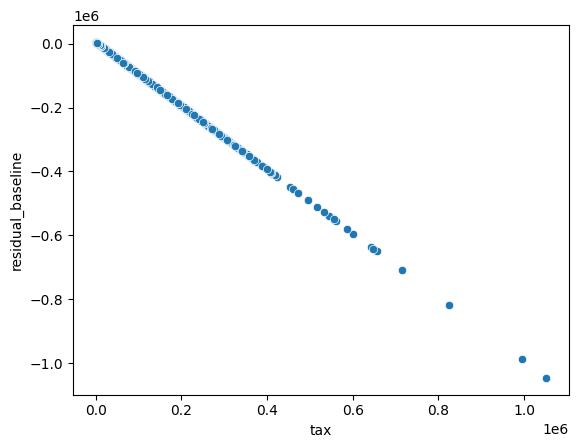

In [16]:
sns.scatterplot(data=train,x=y_train, y='residual_baseline')

In [ ]:
sns.scatterplot(data=train,x=y_train, y='residual')

## 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [ ]:
train.head(2)

In [ ]:
sse = (train.residual **2).sum()
sse

In [ ]:
ess = sum((train.yhat - train.tax.mean())**2)
ess

In [ ]:
tss = ess + sse
tss

In [ ]:
mse = sse/len(train)
mse

In [ ]:
rsme = sqrt(mse)
rsme

## 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [ ]:
train.head(2)

In [ ]:
sse_base = (train.residual_baseline **2).sum()
sse_base

In [ ]:
ess_base = sum((train.baseline - train.tax.mean())**2)
ess_base

In [ ]:
tss_base = ess_base + sse_base
tss_base

In [ ]:
mse_base = sse_base/len(train)
mse_base

In [ ]:
rsme_base = sqrt(mse_base)
rsme_base

## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.



In [ ]:
if sse < sse_base:
    print('Your model did better than baseline')
print(sse - sse_base)

## 7. What is the amount of variance explained in your model?

In [ ]:
explained_variance_score(y_train,train.yhat)

## 8. Is your model better than the baseline model?

In [ ]:
if sse < sse_base:
    print('Your model did better than baseline')
print(sse - sse_base)

## 9. Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot

regression_errors(y, yhat): returns the following values:

sum of squared errors (SSE)

explained sum of squares (ESS)

total sum of squares (TSS)

mean squared error (MSE)

root mean squared error (RMSE)

baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
